# Mask detector

## Image classificator that tries to predict if a person has a mask on the face or not.

### 1. Installing libraries

In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow==2.1.0
!pip install pillow

In [2]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


### 2. Load and read data

Dataset: https://github.com/prajnasb/observations/tree/master/experiements/data

In [4]:
 train_dir = '/home/rexcolt/GitHub/machine-learning-projects/covid-mask-detector/data'
 train_mask_dir = os.path.join(train_dir, 'with_mask')
 train_no_mask_dir = os.path.join(train_dir, 'without_mask')

In [5]:
# Read dataset files
train_mask_fnames = os.listdir(train_mask_dir)
train_no_mask_fnames = os.listdir(train_no_mask_dir)

print(train_mask_fnames[:10])
print(train_no_mask_fnames[:10])

['396-with-mask.jpg', 'augmented_image_193.jpg', '182-with-mask.jpg', '382-with-mask.jpg', 'augmented_image_129.jpg', 'augmented_image_26.jpg', '411-with-mask.jpg', '80-with-mask.jpg', 'augmented_image_244.jpg', 'augmented_image_65.jpg']
['19.jpg', 'augmented_image_193.jpg', 'augmented_image_129.jpg', '352.jpg', '334.jpg', '131.jpg', '18.jpg', '322.jpg', '174.jpg', '281.jpg']


In [6]:
print(f"Total images with mask: {len(train_mask_fnames)}")
print(f"Total images without mask: {len(train_no_mask_fnames)}")

Total images with mask: 690
Total images without mask: 686


### 3. Define and compile model

In [7]:
model = tf.keras.models.Sequential([
    # 16 different filters, 3x3 matrix with 150x150 RGB image
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # Layer with 512 neurons

    # Binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 150
img_width = 150
batch_size = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


### 4. Train model

In [10]:
nb_epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 110 steps, validate for 27 steps
Epoch 1/10
110/110 [==============================] - 22s 203ms/step - loss: 0.3047 - accuracy: 0.8607 - val_loss: 0.1068 - val_accuracy: 0.9704
Epoch 2/10
110/110 [==============================] - 27s 243ms/step - loss: 0.1172 - accuracy: 0.9606 - val_loss: 0.0920 - val_accuracy: 0.9704
Epoch 3/10
110/110 [==============================] - 30s 274ms/step - loss: 0.0798 - accuracy: 0.9716 - val_loss: 0.1432 - val_accuracy: 0.9556
Epoch 4/10
110/110 [==============================] - 25s 223ms/step - loss: 0.0724 - accuracy: 0.9762 - val_loss: 0.0773 - val_accuracy: 0.9741
Epoch 5/10
110/110 [==============================] - 22s 203ms/step - loss: 0.0752 - accuracy: 0.9771 - val_loss: 0.0502 - val_accuracy: 0.9815
Epoch 6/10
110/110 [==============================] - 22s 201ms/step - loss: 0.0326 - accuracy: 0.9853 - val_loss: 0.0645 - val_accuracy: 0.9778
Epoch 7/10
110/110 [=================

### 5. Visualize training metrics

Text(0.5, 1.0, 'Training error')

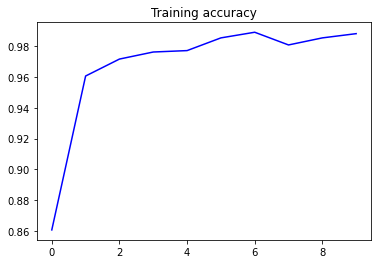

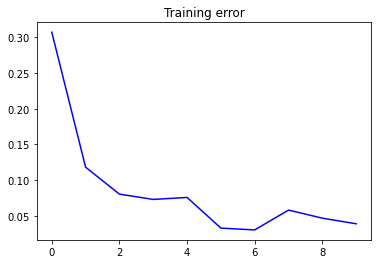

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training error')
plt.title('Training error')

### 6. Testing from the notebook

In [12]:
from tensorflow.keras.preprocessing import image
from PIL import Image

Dude doesnt wear a mask.


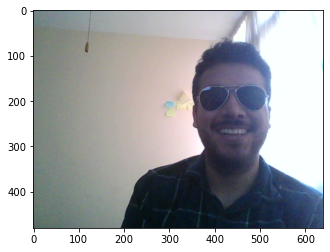

Dude doesnt wear a mask.


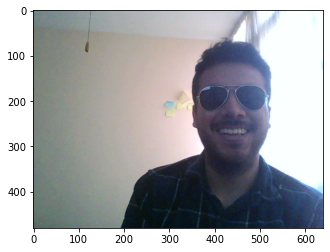

Dude doesnt wear a mask.


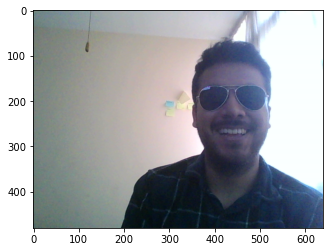

Dude doesnt wear a mask.


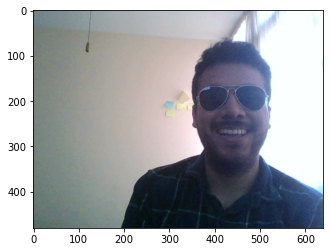

Dude doesnt wear a mask.


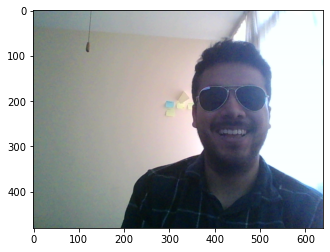

Dude doesnt wear a mask.


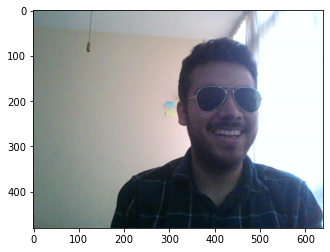

Dude doesnt wear a mask.


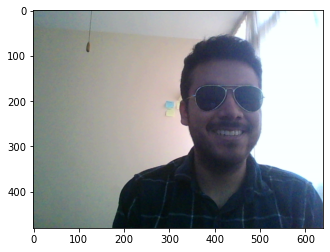

Dude doesnt wear a mask.


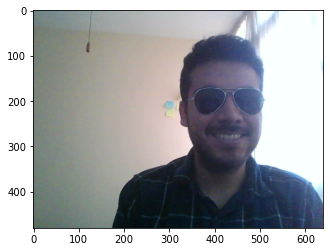

Dude doesnt wear a mask.


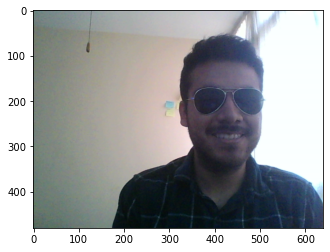

Dude doesnt wear a mask.


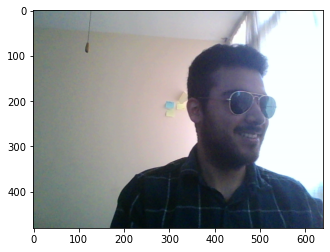

Dude doesnt wear a mask.


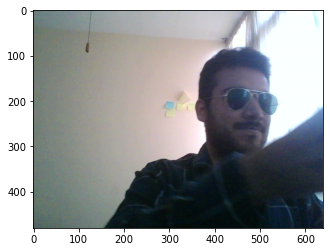

Dude doesnt wear a mask.


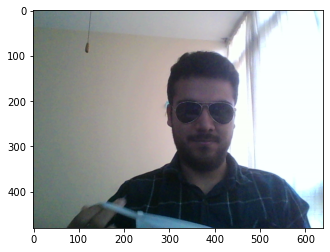

Dude doesnt wear a mask.


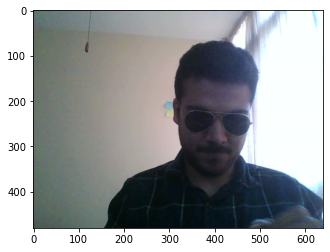

Dude doesnt wear a mask.


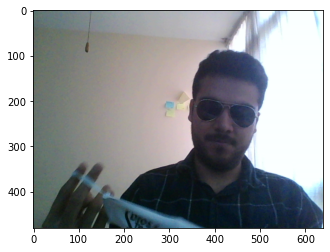

This dude wears a mask.


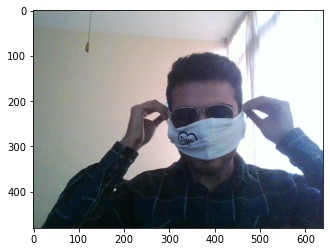

This dude wears a mask.


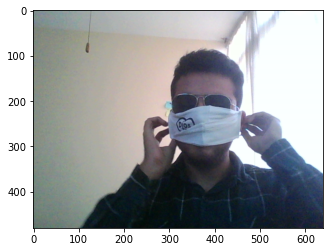

This dude wears a mask.


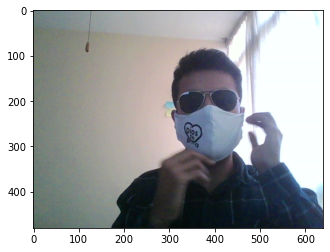

This dude wears a mask.


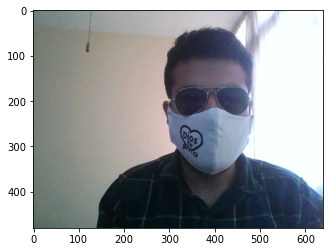

Dude doesnt wear a mask.


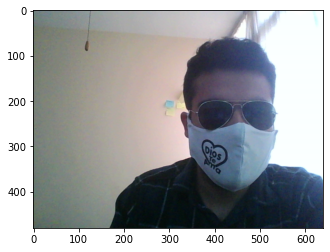

Dude doesnt wear a mask.


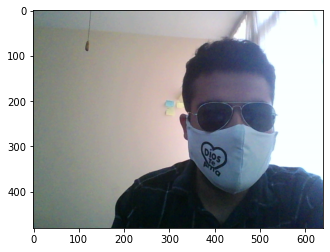

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [18]:
vc = cv2.VideoCapture(0)
plt.ion()

if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)

else:
    is_capturing = False

while is_capturing:
    try:
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_res = cv2.resize(frame, dsize=(150,150), interpolation=cv2.INTER_CUBIC)
        x = image.img_to_array(frame_res)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)

        if classes[0] > 0:
            print("Dude doesnt wear a mask.")
        else:
            print("This dude wears a mask.")

        webcam_preview = plt.imshow(frame)
        try:
            plt.pause(1)
        except Exception:
            pass
    
    except KeyboardInterrupt:
        vc.release()

### 6. (Optional) Convert to a TFLite portable model

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [20]:
open("mask_classifier.tflite", "wb").write(tflite_model)

37981180

### 7. Script loading an image

In [25]:
import tensorflow as tf
import numpy as np

from PIL import Image

interpreter = tf.lite.Interpreter(model_path='mask_classifier.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

floating_model = input_details[0]['dtype'] == np.float32

height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]
image = Image.open('test_image.png').resize((width, height))

input_data = np.expand_dims(img, axis=0)

if floating_model:
    input_data = (np.float32(input_data) - 127.5) / 127.5

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
results = np.squeeze(output_data)
scalar_result = int(round(np.asscalar(results)))

if scalar_result:
    print("No se detectó una mascara")
else:
    print("Se detecto una mascara")

NameError: name 'allocate_tensors' is not defined